# URLs Finder
Part of [Starter Kit](https://github.com/EnterpriseCharacteristicsESSnetBigData/StarterKit "GitHub repositiry of Starter Kit on Enterprise characteristics") of [ESSnet BigData](https://webgate.ec.europa.eu/fpfis/mwikis/essnetbigdata/index.php/ESSnet_Big_Data "ESSnet Big Data is a project within the European statistical system (ESS) jointly undertaken by 28 partners.") on [WPC Enterprise characteristics](https://webgate.ec.europa.eu/fpfis/mwikis/essnetbigdata/index.php/WPC_Enterprise_characteristics "Workpackage C (WPC) of ESSnet Big Data focuses on enterprise characteristics.")

## Loading of Pythons' libraries and components

These are the Pythons' libraries and components that URLs Finder modules need:
- [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [glob](https://docs.python.org/3/library/glob.html) is an Unix style pathname pattern expansion.
- [BeautifulSoup](https://pypi.org/project/beautifulsoup4/) is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.
- [requests](https://pypi.org/project/requests/) allows you to send HTTP/1.1 requests extremely easily.
- [re](https://docs.python.org/3/library/re.html) provides regular expression matching operations similar to those found in Perl.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [time](https://docs.python.org/3/library/time.html) provides various time-related functions.
- [unquote](https://docs.python.org/3/library/urllib.parse.html) replace %xx escapes by their single-character equivalent.
- [urlparse](https://docs.python.org/3/library/urllib.parse.html) parse a URL into six components, returning a 6-item named tuple. This corresponds to the general structure of a URL: scheme://netloc/path;parameters?query#fragment.
- [tqdm](https://pypi.org/project/tqdm/) provides a progress bar.
- [datetime](https://docs.python.org/3/library/datetime.html) module supplies classes for manipulating dates and times.
- [logging](https://docs.python.org/3/library/logging.html) defines functions and classes which implement a flexible event logging system for applications and libraries.

In [1]:
import pandas as pd
import glob
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import time
from urllib.parse import unquote
from urllib.parse import urlparse
from tqdm import tqdm
from datetime import datetime
import logging

## Variables

These are the variables that URLs Finder modules needs:
- version \- identification of the scraped files by date, id or other.
- title \- name of the project, also used for scraped files names.
- startpath \- directory where a csv file with Enterprises information is located.
- scrapepath \- directory where a csv files with scraped Enterprises information are saved.
- logpath \- directory where event logging information is saved. 
- blacklistpath \- directory where a csv file with blacklisted URLs is located.
- startfile \- name of a csv file with Enterprises information.
- scrapefile \- name of a csv file with scraped information from websites.
- sapifile \- name of a csv file with scraped information from search engine [Duck Duck Go](https://duckduckgo.com "The best search engine for privacy").
- toscrapefile \- name of a csv file with URLs from websites that will be scraped.
- logfile \- name of a events log file.
- blacklistfile \- name of a csv file with blacklisted URLs.
- csv_delimiter \- delimiter of the csv file, eg.: ";".
- csv_encoding \- encoding of the csv file, eg.: "utf-8".
- headers \- HTTP request header information.

In [2]:
version=datetime.now().strftime('%Y-%m-%d')
title='URLs Finder Starter Kit'
startpath='.\\sbr_data\\'
scrapepath='.\\scrape_data\\'
logpath='.\\logs\\'
blacklistpath='.\\black_list_urls\\'
startfile='SBR_Data_ESSnet.csv'
scrapefile='URLs_Finder_Starter_Kit_Scrape_Data_{0}.csv'.format(version)
sapifile='URLs_Finder_Starter_Kit_SAPI_Data_{0}.csv'.format(version)
toscrapefile='URLs_Finder_Starter_Kit_to_Scrape_Data_{0}.csv'.format(version)
logfile='URLs_Finder_Starter_Kit_Log_Data.log'
blacklistfile='black_list_urls.csv'
csv_delimiter=';'
csv_encoding = 'utf-8'
headers = {
    'user-agent': 'ESSnet BigData WPC URLs Finder Starter Kit - https://webgate.ec.europa.eu/fpfis/mwikis/essnetbigdata/index.php/ESSnet_Big_Data'.encode('utf-8'),
    'Accept-Charset': 'utf-8'
}

## Event logging initialization and start

In [3]:
logging.basicConfig(
    filename='{0}{1}'.format(logpath,logfile),
    filemode = 'a',
    format='%(asctime)s ----- %(levelname)s ::::: %(message)s ..... (%(name)s)',
    datefmt='%Y-%m-%d %H:%M:%S %Z %z',
    level=logging.DEBUG
)
logging.info('Start {0}'.format(title))

## Loading URLs Finder web scraping module

The web scraping module contains one class called URLsFinder. 

In [4]:
# class URLsFinder contains functions responsible to find URLs of Enterprises
class URLsFinder:
    def __init__(self,startpath,startfile,csv_delimiter,csv_encoding,scrapepath,sapifile,toscrapefile,scrapefile,headers,blacklistpath,blacklistfile):
        self.startpath=startpath
        self.startfile=startfile
        self.csv_delimiter=csv_delimiter
        self.csv_encoding=csv_encoding
        self.scrapepath=scrapepath
        self.sapifile=sapifile
        self.toscrapefile=toscrapefile
        self.scrapefile=scrapefile
        self.headers=headers
        self.blacklistpath=blacklistpath
        self.blacklistfile=blacklistfile
    # this method loads csv files with Enterprises ...
    # pd: pandas dataframe object
    # glob: glob object
    # startpath: path to the files with Enterprises information
    # startfile: csv files with Enterprises information
    # csv_delimiter: delimiter of the csv file, eg.: ;
    # csv_encoding: encoding of the csv file, eg.: utf-8
    def loadFiles(self, *args, **kwargs):
        if kwargs.get('file', None)=='blacklist':
            path1 = r'{0}{1}'.format(self.blacklistpath,self.blacklistfile) # use your path            
        else:
            path1 = r'{0}{1}'.format(self.startpath,self.startfile) # use your path
        all_files = glob.glob(path1, recursive=True)
        li = []
        for fn in all_files:
            print(fn)
            df = pd.read_csv(fn,delimiter=self.csv_delimiter,encoding = self.csv_encoding, dtype=str)
            df.replace(regex={r'\n': '', '\t': '', r'\s+': ' '}, inplace=True)
            print('All records {}'.format(df.shape))
            #dfe=df.loc[~(df[SBR_ID].str.contains('\d\d\d\d\d\d\d\d\d', na=False))]
            #print('Records with errors {}'.format(dfe.shape))
            li.append(df)
        df=pd.concat(li, axis=0, ignore_index=True, sort=False)
        df=df.fillna('').astype(str)
        df.columns = df.columns.str.strip()
        return df
    # this method search ...
    def querySearchEngine(self,df, *args, **kwargs):
        sleep=kwargs.get('sleep', 6)
        timeout=kwargs.get('timeout', 3)
        dfn=pd.DataFrame()
        dfe=pd.DataFrame()
        with tqdm(total=len(list(df.iterrows()))) as pbar:
            for index, row in df.iterrows():
                pbar.set_description('processed: %s %s ' % (row['ID'], row['Name']))
                pbar.update(1)
                search_string=re.sub('\s', '+',re.sub('\s+', ' ',re.sub('\r', ' ',re.sub('\n', ' ',row['Name'])).strip()))
                url='https://duckduckgo.com/html/?q={0}'.format(search_string)
                try:
                    page = requests.get(url, headers=self.headers, timeout=timeout)
                except requests.ConnectionError:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Error':"Connection problems"
                    }, ignore_index=True)
                except requests.HTTPError:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Error':"HTTP error"
                    }, ignore_index=True)
                except requests.Timeout:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Error':"Timeout occurred"
                    }, ignore_index=True)
                except requests.TooManyRedirects:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Error':"Too many redirects"
                    }, ignore_index=True)
                except requests.RequestException:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Error':"Generic exception"
                    }, ignore_index=True)
                else:
                    if page.status_code == 200:
                        getmax=10
                        i=0
                        try:
                            bs = BeautifulSoup(page.content,'lxml')
                        except:
                            dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                                'Link position':row['Link position'],'URL to scrape':row['URL to scrape'],'Error':"Read page content with BeautifulSoup"
                            }, ignore_index=True)    
                        else:
                            topurls=bs.findAll('a',{'class':['result__a']})
                            for topurl in topurls:
                                geturl=re.search('uddg=(.+)', topurl.get('href'))
                                if geturl and i<getmax and unquote(geturl.group(1))[-4:].lower() not in ['.pdf','.xml','.jpg','.png','.gif','.zip','.rar','.mp4','.avi','.doc','.docx']:
                                    vURL=0
                                    try:
                                        u1=urlparse(unquote(geturl.group(1)))
                                        u2=urlparse(row['URL'])
                                    except:
                                        dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                                            'Link position':row['Link position'],'Error':"URL parse"
                                        }, ignore_index=True)
                                    else:
                                        if urlparse(unquote(geturl.group(1))).netloc==urlparse(row['URL']).netloc:
                                            vURL=1
                                        dfn=dfn.append({
                                            'ID':row['ID'],
                                            'Name':row['Name'],
                                            'URL':row['URL'],
                                            'Suggested URL':unquote(geturl.group(1)),
                                            'Link position':i,
                                            'Has equal domain':vURL
                                        }, ignore_index=True)
                                i=i+1
                finally:
                    time.sleep(sleep)
        dfn.to_csv(r'{0}{1}'.format(self.scrapepath,self.sapifile), sep=self.csv_delimiter, encoding = self.csv_encoding, index = None, header=True)
        return [dfn,dfe]
    def blacklistURLs(self,blacklisturls):
        dfns = pd.read_csv(r'{0}{1}'.format(self.scrapepath,self.sapifile),delimiter=self.csv_delimiter,encoding = self.csv_encoding, dtype=str)
        dfns = dfns[~dfns['Suggested URL'].str.contains('|'.join(blacklisturls))]
        dfns['Suggested URL']= dfns['Suggested URL'].apply(lambda x:unquote(x))
        dfns['Has Simple Suggested URL']=dfns['Suggested URL'].apply(lambda x: 1 if urlparse(x).path in ['','/','/en','/en/'] and urlparse(x).query=='' and urlparse(x).fragment=='' else 0)
        return dfns
    # this method search ...
    def getURLsToScrape(self,dfns, *args, **kwargs):
        sleep=kwargs.get('sleep', 1)
        timeout=kwargs.get('timeout', 5)
        urlsatstart=kwargs.get('urlsatstart', 10)
        urlsatend=kwargs.get('urlsatend', 10)
        dfne=pd.DataFrame()
        dfe=pd.DataFrame()
        with tqdm(total=len(list(dfns.iterrows()))) as pbar:
            for index, row in dfns.iterrows():
                pbar.set_description('processed: %s %s ' % (row['ID'], row['Suggested URL']))
                pbar.update(1)
                try:
                    page = requests.get(row['Suggested URL'], headers=self.headers, timeout=timeout)
                except requests.ConnectionError:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                        'Link position':row['Link position'],'Error':"Connection problems"
                    }, ignore_index=True)
                except requests.HTTPError:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                        'Link position':row['Link position'],'Error':"HTTP error"
                    }, ignore_index=True)
                except requests.Timeout:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                        'Link position':row['Link position'],'Error':"Timeout occurred"
                    }, ignore_index=True)
                except requests.TooManyRedirects:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                        'Link position':row['Link position'],'Error':"Too many redirects"
                    }, ignore_index=True)
                except requests.RequestException:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                        'Link position':row['Link position'],'Error':"Generic exception"
                    }, ignore_index=True)
                else:
                    if page.status_code == 200:
                        try:
                            bs = BeautifulSoup(page.content,'lxml')
                        except:
                            dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                                'Link position':row['Link position'],'URL to scrape':row['URL to scrape'],'Error':"Read page content with BeautifulSoup"
                            }, ignore_index=True)    
                        else:
                            topurls=bs.findAll('a')
                            i=0
                            for topurl in topurls:
                                geturl=topurl.get('href')
                                if geturl:
                                    prefix, success, geturl=geturl.partition("#")
                                    if not success: geturl = prefix
                                try:
                                    u1=urlparse(geturl)
                                    u2=urlparse(row['Suggested URL'])
                                except:
                                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                                        'Link position':row['Link position'],'Error':"URL parse"
                                    }, ignore_index=True)
                                else:
                                    if geturl and geturl[0:2]=='//':
                                        geturl=urlparse(row['Suggested URL']).scheme+':'+geturl
                                    elif geturl and geturl[0:1]=='/':
                                        geturl=urlparse(row['Suggested URL']).scheme+'://'+urlparse(row['Suggested URL']).netloc+geturl
                                    elif geturl and geturl[0:4]!='http' and geturl[0:6]!='mailto':
                                        geturl=urlparse(row['Suggested URL']).scheme+'://'+urlparse(row['Suggested URL']).netloc+'/'+geturl.partition("@")[-1]
                                    if geturl and i<urlsatstart and urlparse(geturl).netloc==urlparse(row['Suggested URL']).netloc and geturl[-4:].lower() not in ['.pdf','.xml','.jpg','.png','gif','.zip']:
                                        dfne=dfne.append({
                                            'ID':row['ID'],
                                            'Name':row['Name'],
                                            'URL':row['URL'],
                                            'Suggested URL':row['Suggested URL'],
                                            'Link position':row['Link position'],
                                            'Has Simple Suggested URL':row['Has Simple Suggested URL'],
                                            'Has equal domain':row['Has equal domain'],
                                            'URL to scrape':unquote(geturl)
                                        }, ignore_index=True)
                                        i=i+1
                                if i==urlsatstart:
                                    break
                            i=0
                            for topurl in reversed(topurls):
                                geturl=topurl.get('href')
                                if geturl:
                                    prefix, success, geturl=geturl.partition("#")
                                    if not success: geturl = prefix
                                try:
                                    u1=urlparse(geturl)
                                    u2=urlparse(row['Suggested URL'])
                                except:
                                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                                        'Link position':row['Link position'],'Error':"URL parse"
                                    }, ignore_index=True)
                                else:
                                    if geturl and geturl[0:2]=='//':
                                        geturl=urlparse(row['Suggested URL']).scheme+':'+geturl
                                    elif geturl and geturl[0:1]=='/':
                                        geturl=urlparse(row['Suggested URL']).scheme+'://'+urlparse(row['Suggested URL']).netloc+geturl
                                    elif geturl and geturl[0:4]!='http' and geturl[0:6]!='mailto':
                                        geturl=urlparse(row['Suggested URL']).scheme+'://'+urlparse(row['Suggested URL']).netloc+'/'+geturl.partition("@")[-1]
                                    if geturl and i<urlsatend and urlparse(geturl).netloc==urlparse(row['Suggested URL']).netloc and geturl[-4:].lower() not in ['.pdf','.xml','.jpg','.png','gif','.zip']:
                                        dfne=dfne.append({
                                            'ID':row['ID'],
                                            'Name':row['Name'],
                                            'URL':row['URL'],
                                            'Suggested URL':row['Suggested URL'],
                                            'Link position':row['Link position'],
                                            'Has Simple Suggested URL':row['Has Simple Suggested URL'],
                                            'Has equal domain':row['Has equal domain'],
                                            'URL to scrape':unquote(geturl)
                                        }, ignore_index=True)
                                        i=i+1
                                if i==urlsatend:
                                    break
                finally:
                    time.sleep(sleep)
        dfne.drop_duplicates(inplace=True)
        dfne.drop_duplicates(subset=['ID', 'URL to scrape'], inplace=True)
        dfne.reset_index(drop=True, inplace=True)
        dfne.to_csv(r'{0}{1}'.format(self.scrapepath,self.toscrapefile), sep=self.csv_delimiter, encoding = self.csv_encoding, index = None, header=True)
        dfnt = pd.read_csv(r'{0}{1}'.format(self.scrapepath,self.toscrapefile),delimiter=self.csv_delimiter,encoding = self.csv_encoding, dtype=str)
        return [dfnt,dfe]
    # this method search ...
    def scrapeURLs(self,frame,dfnt, *args, **kwargs):
        sleep=kwargs.get('sleep', 1)
        timeout=kwargs.get('timeout', 5)
        dfnes=pd.DataFrame()
        dfe=pd.DataFrame()
        with tqdm(total=len(list(dfnt.iterrows()))) as pbar:
            for index, row in dfnt.iterrows():
                pbar.set_description('processed: %s %s ' % (row['ID'], row['URL to scrape']))
                pbar.update(1)
                try:
                    page = requests.get(row['URL to scrape'], headers=self.headers, timeout=timeout)
                except requests.ConnectionError:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                        'Link position':row['Link position'],'URL to scrape':row['URL to scrape'],'Error':"Connection problems"
                    }, ignore_index=True)
                except requests.HTTPError:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                        'Link position':row['Link position'],'URL to scrape':row['URL to scrape'],'Error':"HTTP error"
                    }, ignore_index=True)
                except requests.Timeout:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                        'Link position':row['Link position'],'URL to scrape':row['URL to scrape'],'Error':"Timeout occurred"
                    }, ignore_index=True)
                except requests.TooManyRedirects:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                        'Link position':row['Link position'],'URL to scrape':row['URL to scrape'],'Error':"Too many redirects"
                    }, ignore_index=True)
                except requests.RequestException:
                    dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                        'Link position':row['Link position'],'URL to scrape':row['URL to scrape'],'Error':"Generic exception"
                    }, ignore_index=True)
                else:
                    vID=0
                    vName=0
                    vPhone=0
                    vEmail=0
                    vAddress=0
                    vPopulatedplace=0
                    vDomain=0
                    if page.status_code == 200:
                        try:
                            bs = BeautifulSoup(page.content,'lxml')
                        except:
                            dfe=dfe.append({'ID':row['ID'],'Name':row['Name'],'URL':row['URL'],'Suggested URL':row['Suggested URL'],
                                'Link position':row['Link position'],'URL to scrape':row['URL to scrape'],'Error':"Read page content with BeautifulSoup"
                            }, ignore_index=True)    
                        else:
                            [s.extract() for s in bs('script')]
                            texts=bs.getText()
                            texts=re.sub(' +', ' ',texts.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ').strip())
                            dfl=frame
                            dfs=dfl.loc[dfl['ID'] == row['ID']]
                            if re.search(re.escape(dfs['ID'].iloc[0]), texts, re.IGNORECASE):
                                vID=1
                            if re.search(re.escape(dfs['Name'].iloc[0]), texts, re.IGNORECASE):
                                vName=1
                            if re.search(re.escape(dfs['Phone'].iloc[0]), texts, re.IGNORECASE):
                                vPhone=1
                            if re.search(re.escape(dfs['Email'].iloc[0]), texts, re.IGNORECASE):
                                vEmail=1
                            if re.search(re.escape(dfs['Address'].iloc[0]), texts, re.IGNORECASE):
                                vAddress=1
                            if re.search(re.escape(dfs['Populated place'].iloc[0]), texts, re.IGNORECASE):
                                vPopulatedplace=1
                            if re.search('@',dfs['Email'].iloc[0], re.IGNORECASE):
                                if re.search(dfs['Email'].iloc[0].split("@",1)[1], row['Suggested URL'], re.IGNORECASE):
                                    vDomain=1
                    dfnes=dfnes.append({
                        'ID':row['ID'],
                        'Name':row['Name'],
                        'URL':row['URL'],
                        'Suggested URL':row['Suggested URL'],
                        'Link position':row['Link position'],
                        'URL to scrape':row['URL to scrape'],
                        'Status code': page.status_code,
                        'Has Simple Suggested URL':row['Has Simple Suggested URL'],
                        'Has equal domain':row['Has equal domain'],
                        'Has ID':vID,
                        'Has Name':vName,
                        'Has Phone':vPhone,
                        'Has Email':vEmail,
                        'Has equal Email and URL Domains':vDomain,
                        'Has Address':vAddress,
                        'Has Populated place':vPopulatedplace
#                        'Has Simple Suggested URL':vSimpleURL
                    }, ignore_index=True)
                finally:
                    time.sleep(sleep)
        dfnes.to_csv(r'{0}{1}'.format(self.scrapepath,self.scrapefile), sep=self.csv_delimiter, encoding = self.csv_encoding, index = None, header=True)
        return [dfnes,dfe]

## Running URLs Finder web scraping module

### Making an instance of URLs Finder web scraping module

This is done by calling ***main*** method of the ***URLsFinder*** class with the following parameters (variables we defined):
- startpath
- startfile
- csv_delimiter
- csv_encoding
- scrapepath
- sapifile
- toscrapefile
- scrapefile
- headers
- blacklistpath
- blacklistfile

In [5]:
uf=URLsFinder(startpath,startfile,csv_delimiter,csv_encoding,scrapepath,sapifile,toscrapefile,scrapefile,headers,blacklistpath,blacklistfile)

### Loading Enterprises information

This is done by calling ***loadFiles*** method of the ***URLsFinder*** class without parameters. The method returns a *pandas dataframe object* with Enterprises information from the csv file with name from variable *startfile* in the directory with path in the variable *startpath*.

In [6]:
frame=uf.loadFiles()
frame

.\sbr_data\SBR_Data_ESSnet.csv
All records (204, 7)


,ID,Name,URL,Phone,Email,Address,Populated place
0,000695146,National Statistical Institute,https://www.nsi.bg,(+359 2) 9857 111,info@nsi.bg,"2, P. Volov Str.;1038 Sofia, Bulgaria",Sofia
1,000000000,National Statistical Institute,,(+359 2) 9857 111,info@nsi.bg,"2, P. Volov Str.;1038 Sofia, Bulgaria",Sofia
2,000000001,STATISTIK AUSTRIA,http://www.statistik.at,+43 (1) 711 28-0,info@statistik.gv.at,Österreich Guglgasse 13 1110 Wien,Wien
3,000000002,STATISTIK AUSTRIA,,+43 (1) 711 28-0,info@statistik.gv.at,Österreich Guglgasse 13 1110 Wien,Wien
4,000000003,STATISTIK AUSTRIA,,+43 (1) 711 28-0,,Österreich Guglgasse 13 1110 Wien,Wien
5,000000004,STATISTIK AUSTRIA,,,info@statistik.gv.at,Österreich Guglgasse 13 1110 Wien,Wien
6,000000005,STATISTIK AUSTRIA,,,,Österreich Guglgasse 13 1110 Wien,Wien
7,000000006,Institute of Statistics,http://www.instat.gov.al,+355 (4) 2233356,info@instat.gov.al,"St. Vllazën Huta, Building 35, Entrance 1;Tira...",Tirana
8,000000007,Institute of Statistics,,+355 (4) 2233356,info@instat.gov.al,"St. Vllazën Huta, Building 35, Entrance 1;Tira...",Tirana
9,000000008,Institute of Statistics,http://www.instat.gov.al,,info@instat.gov.al,"St. Vllazën Huta, Building 35, Entrance 1;Tira...",Tirana


### Loading a blacklisted URLs

This is done by calling ***loadFiles*** method of the ***URLsFinder*** class with parameter ***file*** equal to **blacklist**. The method returns a pandas dataframe object with blaklisted URLs form the csv file with name from variable blacklistfile in the directory with path in the variable blacklistpath.

In [7]:
bl=uf.loadFiles(file='blacklist')
bl=bl['Black list URLs'].sort_values(ascending=True).unique().tolist()
bl

.\black_list_urls\black_list_urls.csv
All records (70, 1)


['abcnews.bg',
 'baq.kz',
 'bcc.bg',
 'bezplatno.net',
 'bgfirms.info',
 'bgproizvoditel.com',
 'bgrabotodatel.com',
 'bgregistar.com',
 'bgstart.net',
 'bia-bg.com',
 'bivol.bg',
 'biznes-bulgaria.com',
 'biznes-catalog.com',
 'biznes-katalog.com',
 'biznes-spravka.com',
 'bizneslist.com',
 'blitz.bg',
 'btcatalogue.bg',
 'business.bg',
 'catalog.bg',
 'cks.bg',
 'dnevnik.bg',
 'econ.bg',
 'eufunds.bg',
 'facebook.com',
 'firma.bg',
 'genderportal.eu',
 'glassdoor.com',
 'goldenpages.bg',
 'google.com',
 'government.bg',
 'grabo.bg',
 'grabvai.com',
 'inegi.org.mx',
 'info-register.com',
 'infobel.bg',
 'infomreja.bg',
 'informator.bg',
 'investor.bg',
 'jobs.bg',
 'jobtiger.bg',
 'kartasofia.com',
 'korektnafirma.com',
 'linkedin.com',
 'nacionalen-biznes.com',
 'official-portal.com',
 'online-registri.com',
 'osnatpk.com',
 'papagal.bg',
 'pisar.bg',
 'playbookmaker.ru',
 'referatite.org',
 'registarnastroitelstvoto.com',
 'stroiteli-bg.com',
 'stroitelstvoto.bg',
 'subscribe.ru',
 

### Querying a Search Engine with Enterprises information

This is done by calling ***querySearchEngine*** method of the ***URLsFinder*** class with the following parameters:
- *pandas dataframe object* with Enterprises information
- *timeout* parameter with number of seconds for keep the request open (optional, default 3)
- *sleep* parameter with number of seconds between each query request to the Search Engine (optional, default 6)

The method saves csv file with Suggested Enterprises URLs from Querying the Search Engine by the name in variable *sapifile* in directory in variable *scrapepath*.

The method returns two *pandas dataframe objects*:
- Suggested Enterprises URLs from Querying the Search Engine (first pandas dataframe object)
- Errors from Querying the Search Engine (second pandas dataframe object)

In [8]:
dfn=uf.querySearchEngine(frame,timeout=5,sleep=6)

processed: 000000211 Statistics Sweden : 100%|███████████████████████████████████████| 204/204 [22:26<00:00,  6.54s/it]    


#### Displaying successful results from Querying a Search Engine with Enterprises information

The *pandas dataframe object* with Suggested Enterprises URLs has the following structure:
- ID (SBR Enterprise ID)
- Name (Enterprise name)
- URL (Enterprise known URL from SBR)
- Suggested URL (URL of Enterprise that Serach Engine yields)
- Link position (order number of URL of Enterprise that Serach Engine yields)
- Has equal domain (1 if domains of known and suugested URLs are equal else 0)

In [9]:
dfn[0]

,Has equal domain,ID,Link position,Name,Suggested URL,URL
0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg
1,0.0,000695146,1.0,National Statistical Institute,https://www.ine.es/en/welcome.shtml,https://www.nsi.bg
2,1.0,000695146,2.0,National Statistical Institute,https://www.nsi.bg/en/content/11223/statistica...,https://www.nsi.bg
3,0.0,000695146,3.0,National Statistical Institute,http://www.insse.ro/cms/en,https://www.nsi.bg
4,0.0,000695146,4.0,National Statistical Institute,https://en.wikipedia.org/wiki/List_of_national...,https://www.nsi.bg
5,0.0,000695146,5.0,National Statistical Institute,https://en.wikipedia.org/wiki/National_Statist...,https://www.nsi.bg
6,0.0,000695146,6.0,National Statistical Institute,https://www.niss.org/,https://www.nsi.bg
7,0.0,000695146,7.0,National Statistical Institute,https://en.wikipedia.org/wiki/Indian_Statistic...,https://www.nsi.bg
8,0.0,000695146,8.0,National Statistical Institute,https://statinja.gov.jm/,https://www.nsi.bg
9,0.0,000695146,9.0,National Statistical Institute,https://www.ons.gov.uk/,https://www.nsi.bg


#### Displaying unsuccessful results from Querying a Search Engine with Enterprises information

The *pandas dataframe object* with Errors from Querying the Search Engine.

In [10]:
dfn[1]

""


### Removing blacklisted URLs from successful Search Engine results

This is done by calling ***blacklistURLs*** method of the ***URLsFinder*** class with parameter *pandas dataframe object* with blaklisted URLs.
    
This method removes rows from *pandas dataframe object* with Suggested Enterprises URLs if Suggested URL domain is blacklisted. The method returns *pandas dataframe object* with Suggested Enterprises URLs without blacklisted ones.
The *pandas dataframe object* has the following structure:
- ID (SBR Enterprise ID)
- Name (Enterprise name)
- URL (Enterprise known URL from SBR)
- Suggested URL (URL of Enterprise that Serach Engine yields)
- Link position (order number of URL of Enterprise that Serach Engine yields)
- Has equal domain (1 if domains of known and suugested URLs are equal else 0)
- Has Simple Suggested URL (1 if Suggested URL contains only protocol, domain and language path "en" else 0)

In [11]:
dfns=uf.blacklistURLs(bl)
dfns

,Has equal domain,ID,Link position,Name,Suggested URL,URL,Has Simple Suggested URL
0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,1
1,0.0,000695146,1.0,National Statistical Institute,https://www.ine.es/en/welcome.shtml,https://www.nsi.bg,0
2,1.0,000695146,2.0,National Statistical Institute,https://www.nsi.bg/en/content/11223/statistica...,https://www.nsi.bg,0
3,0.0,000695146,3.0,National Statistical Institute,http://www.insse.ro/cms/en,https://www.nsi.bg,0
6,0.0,000695146,6.0,National Statistical Institute,https://www.niss.org/,https://www.nsi.bg,1
8,0.0,000695146,8.0,National Statistical Institute,https://statinja.gov.jm/,https://www.nsi.bg,1
9,0.0,000695146,9.0,National Statistical Institute,https://www.ons.gov.uk/,https://www.nsi.bg,1
10,0.0,000000000,0.0,National Statistical Institute,https://www.nsi.bg/en,NaN,1
11,0.0,000000000,1.0,National Statistical Institute,https://www.ine.es/en/welcome.shtml,NaN,0
12,0.0,000000000,2.0,National Statistical Institute,https://www.nsi.bg/en/content/11223/statistica...,NaN,0


### Finding URLs to scrape

This is done by calling ***getURLsToScrape*** method of the ***URLsFinder*** class with the following parameters:
- *pandas dataframe object* with Suggested Enterprises URLs without blacklisted ones
- *timeout* parameter with number of seconds for keep the request open (optional, default 5)
- *sleep* parameter with number of seconds between each query request to the Search Engine (optional, default 1)
- *urlsatstart* parameter with number of URLs to get from the beginning of the web page (optional, default 10)
- *urlsatend* parameter with number of URLs to get from the end of the web page (optional, default 10)

The method saves csv file with URLs to scrape by the name in variable *toscrapefile* in directory in variable *scrapepath*.

The method returns two *pandas dataframe objects*:
- URLs to scrape (first pandas dataframe object)
- Errors from requesting Suggested Enterprises URLs without blacklisted ones (second pandas dataframe object)

In [12]:
dfnt=uf.getURLsToScrape(dfns,timeout=5,sleep=0.5,urlsatstart=10,urlsatend=10)

processed: 000000211 https://www.migrationsverket.se/English/About-the-Migration-Agency/Statistics.html : 100%|█| 1700/1700 [52:34<00:00,  1.14it/s]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

#### Displaying successful results from Finding URLs to scrape

The *pandas dataframe object* with URLs to scrape has the following structure:
- ID (SBR Enterprise ID)
- Name (Enterprise name)
- URL (Enterprise known URL from SBR)
- Suggested URL (URL of Enterprise that Serach Engine yields)
- Link position (order number of URL of Enterprise that Serach Engine yields)
- Has equal domain (1 if domains of known and suugested URLs are equal else 0)
- Has Simple Suggested URL (1 if Suggested URL contains only protocol, domain and language path "en" else 0)
- URL to scrape (first *urlsatstart* and last *urlsatend* URLs taken from the Suggested URL web page)

In [13]:
dfnt[0]

,Has Simple Suggested URL,Has equal domain,ID,Link position,Name,Suggested URL,URL,URL to scrape
0,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/
1,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en
2,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/bg
3,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/24/basic-page/co...
4,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/23/basic-page/links
5,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/biblioteka/en/
6,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/11237
7,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/11224
8,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/14881/
9,1.0,1.0,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/aggregator/sources/1


#### Displaying unsuccessful results from Finding URLs to scrape

The *pandas dataframe object* with Errors from requesting Suggested Enterprises URLs without blacklisted ones.

The *pandas dataframe object* has the following structure:
- ID (SBR Enterprise ID)
- Name (Enterprise name)
- URL (Enterprise known URL from SBR)
- Suggested URL (URL of Enterprise that Serach Engine yields)
- Link position (order number of URL of Enterprise that Serach Engine yields)
- Error (Description of the error encountered)

In [14]:
dfnt[1]

,Error,ID,Link position,Name,Suggested URL,URL
0,Connection problems,000000029,9.0,Statistics Office,https://www.psa.gov.ph/,NaN
1,Connection problems,000000028,0.0,Statistics Office,https://www.cso.ie/,https://www.gibraltar.gov.gi
2,Timeout occurred,000000031,3.0,Statistics Greenland,https://www.economywatch.com/economic-statisti...,http://www.stat.gl/
3,Connection problems,000000034,9.0,Hellenic Statistical Authority,https://eurostat.statistics.gr/default_en,https://www.statistics.gr
4,Timeout occurred,000000035,7.0,National Statistical Service,https://www.mof.gov.cy/mof/cystat/statistics.n...,https://www.statistics.gr
5,Connection problems,000000036,9.0,Hellenic Statistical Authority,https://eurostat.statistics.gr/default_en,NaN
6,Connection problems,000000044,0.0,Central Statistics Office,https://www.cso.ie/en/index.html,https://www.cso.ie
7,Connection problems,000000044,1.0,Central Statistics Office,https://www.zamstats.gov.zm/,https://www.cso.ie
8,Connection problems,000000044,2.0,Central Statistics Office,https://www.cso.ie/en/statistics/,https://www.cso.ie
9,Connection problems,000000045,0.0,Central Statistics Office,https://www.cso.ie/en/index.html,NaN


### Scraping URLs

This is done by calling ***scrapeURLs*** method of the ***URLsFinder*** class with the following parameters:
- *pandas dataframe object* with Enterprises information
- *pandas dataframe object* with URLs to scrape
- *timeout* parameter with number of seconds for keep the request open (optional, default 5)
- *sleep* parameter with number of seconds between each query request to the Search Engine (optional, default 1)

The method saves csv file with scraped URLs by the name in variable *scrapefile* in directory in variable *scrapepath*.

The method returns two *pandas dataframe objects*:
- scraped URLs (first pandas dataframe object)
- Errors from requesting URLs to scrape (second pandas dataframe object)

In [15]:
dfnes=uf.scrapeURLs(frame,dfnt[0],timeout=5,sleep=0.5)

processed: 000000026 https://tr-ex.me/translation/english-spanish/federal+statistical+office [56:46<8:47:14,  1.79s/it]                                                                                                                     
processed: 000000026 https://tr-ex.me/translation/english-spanish/federal+statistical+office
processed: 000000035 https://www.abs.gov.au/AUSSTATS/abs@.nsf/viewcontent?readform&view=ProductsbyReleaseDate&Action=expandview&num=1                                                                                          
processed: 000000035 https://www.abs.gov.au/AUSSTATS/abs@.nsf/viewcontent?readform&view=ProductsbyReleaseDate&Action=expandview&num=1
processed: 000000211 https://www.migrationsverket.se/English/About-the-Migration-Agency/Country-of-origin-information-Lifos.html : 100%|█| 20116/20116 [8:06:35<00:00,  1.09s/it]                                                                                                                                       

#### Displaying successful results from Scraping URLs

The *pandas dataframe object* with scraped URLs has the following structure:
- ID (SBR Enterprise ID)
- Name (Enterprise name)
- URL (Enterprise known URL from SBR)
- Suggested URL (URL of Enterprise that Serach Engine yields)
- Link position (order number of URL of Enterprise that Serach Engine yields)
- Has equal domain (1 if domains of known and suugested URLs are equal else 0)
- Has Simple Suggested URL (1 if Suggested URL contains only protocol, domain and language path "en" else 0)
- URL to scrape (first *urlsatstart* and last *urlsatend* URLs taken from the Suggested URL web page)
- Status code (status code from URL to scrape HTTP request)
- Has ID (1 **if** Enterprise SBR ID is found in scraped URL web page text **else** 0)
- Has Name (1 **if** Enterprise Name is found in scraped URL web page text **else** 0)
- Has Phone (1 **if** Enterprise Phone is found in scraped URL web page text **else** 0)
- Has Address (1 **if** Enterprise Address is found in scraped URL web page text **else** 0)
- Has Populated place (1 **if** Enterprise Populated place location is found in scraped URL web page text **else** 0)
- Has Email (1 **if** Enterprise Email is found in scraped URL web page text **else** 0)
- Has Name (1 **if** Enterprise Name is found in scraped URL web page text **else** 0)
- Has equal Email and URL Domains (1 **if** Enterprise Email domain is equal to Suggested URL domain **else** 0)

In [16]:
dfnes[0]

,Has Address,Has Email,Has ID,Has Name,Has Phone,Has Populated place,Has Simple Suggested URL,Has equal Email and URL Domains,Has equal domain,ID,Link position,Name,Status code,Suggested URL,URL,URL to scrape
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/bg
3,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/24/basic-page/co...
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/23/basic-page/links
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/biblioteka/en/
6,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/14881/
7,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/aggregator/sources/1
8,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/20/basic-page/ab...
9,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,000695146,0.0,National Statistical Institute,200.0,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/content/99/basic-page/le...


#### Displaying unsuccessful results from Scraping URLs

The *pandas dataframe object* with Errors from requesting URL to scrape.

The *pandas dataframe object* has the following structure:
- ID (SBR Enterprise ID)
- Name (Enterprise name)
- URL (Enterprise known URL from SBR)
- Suggested URL (URL of Enterprise that Serach Engine yields)
- Link position (order number of URL of Enterprise that Serach Engine yields)
- URL to scrape (URL that has been requested and yields error)
- Error (Description of the error encountered)

In [17]:
dfnes[1]

,Error,ID,Link position,Name,Suggested URL,URL,URL to scrape
0,Timeout occurred,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/11237
1,Timeout occurred,000695146,0.0,National Statistical Institute,https://www.nsi.bg/en,https://www.nsi.bg,https://www.nsi.bg/en/node/11224
2,Timeout occurred,000695146,2.0,National Statistical Institute,https://www.nsi.bg/en/content/11223/statistica...,https://www.nsi.bg,https://www.nsi.bg/en/content/11237/business-s...
3,Timeout occurred,000695146,3.0,National Statistical Institute,http://www.insse.ro/cms/en,https://www.nsi.bg,http://www.insse.ro/cms/en/content/nis-leaders...
4,Timeout occurred,000695146,3.0,National Statistical Institute,http://www.insse.ro/cms/en,https://www.nsi.bg,http://www.insse.ro/cms/en/content/copyrighten
5,Timeout occurred,000695146,3.0,National Statistical Institute,http://www.insse.ro/cms/en,https://www.nsi.bg,http://www.insse.ro/cms/en/content/information...
6,Timeout occurred,000695146,3.0,National Statistical Institute,http://www.insse.ro/cms/en,https://www.nsi.bg,http://www.insse.ro/old/en
7,Timeout occurred,000695146,3.0,National Statistical Institute,http://www.insse.ro/cms/en,https://www.nsi.bg,http://www.insse.ro/cms/en/content/cookie-policy
8,Timeout occurred,000000007,3.0,Institute of Statistics,http://www.instat.gov.al/en/Home.aspx,NaN,http://www.instat.gov.al/en/publications/press...
9,Timeout occurred,000000010,9.0,Institute of Statistics,https://www.istat.it/en/,NaN,https://www.istat.it/en/labour


## Loading of Pythons' libraries and components for Machine Learning

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 3) # (w, h)
plt.rcParams["figure.dpi"] = 100

## Loading URLs Finder machine learning module

In [4]:
class URLsFinderPrepare:
    def __init__(self,csv_delimiter,csv_encoding,scrapepath,scrapefile):
        self.csv_delimiter=csv_delimiter
        self.csv_encoding=csv_encoding
        self.scrapepath=scrapepath
        self.scrapefile=scrapefile
    def prepareFile(self):
        dflr=pd.read_csv(r'{0}{1}'.format(self.scrapepath,self.scrapefile), delimiter=self.csv_delimiter, encoding = self.csv_encoding, dtype={'ID': object})
        dflr=dflr.loc[(dflr['Status code']==200)]
        dflr['sum']=dflr['Has equal Email and URL Domains']+dflr['Has Email']+dflr['Has Name']+dflr['Has Phone']+dflr['Has Address']+dflr['Has ID']+dflr['Has Populated place']
        dflr1=dflr.groupby(['ID','Name','Suggested URL','Link position','Status code'], as_index=False).agg('sum')
        dflr1['Has Address']=(dflr1['Has Address']>0).astype(int)
        dflr1['Has Email']=(dflr1['Has Email']>0).astype(int)
        dflr1['Has ID']=(dflr1['Has ID']>0).astype(int)
        dflr1['Has Name']=(dflr1['Has Name']>0).astype(int)
        dflr1['Has Phone']=(dflr1['Has Phone']>0).astype(int)
        dflr1['Has Populated place']=(dflr1['Has Populated place']>0).astype(int)
        dflr1['Has Simple Suggested URL']=(dflr1['Has Simple Suggested URL']>0).astype(int)
        dflr1['Has equal Email and URL Domains']=(dflr1['Has equal Email and URL Domains']>0).astype(int)
        dflr1['Has equal domain']=(dflr1['Has equal domain']>0).astype(int)
        dflr1 = pd.merge(dflr1,dflr[['ID','URL']],on=['ID'],how = 'left',left_index=True)
        dflr=dflr1.drop_duplicates(keep='first').reset_index(drop=True)
        dflr.sort_values(by=['ID','Link position'], ascending=[True,True], inplace=True)
        dflr['Has URL']=dflr['URL'].apply(lambda x: 0 if pd.isna(x) else 1)
        dflr=dflr.reset_index(drop=True)
        return dflr
    def prepareLR(self,dflr,test_size,random_state):
        dflr['predict']=dflr[['Has equal domain']]
        dflr['Score']=dflr['sum']-dflr['sum']*dflr['Link position']/100
        idx = dflr.groupby(['ID'])['Score'].transform(max) == dflr['Score']
        dflr=dflr[idx]
        X = dflr[['Has Simple Suggested URL','Has Address','Has Email','Has ID','Has Name','Has Phone','Has Populated place','Has equal Email and URL Domains']]
        y = dflr['predict']
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=random_state)
#        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size) # for production
        logistic_regression= LogisticRegression(solver = 'lbfgs')
        logistic_regression.fit(X_train,y_train)
        y_pred=logistic_regression.predict(X_test)
        return X_train,X_test,y_train,y_test, y_pred, X,logistic_regression
    def prepareCM(self,y_test, y_pred):
        confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual URL'], colnames=['Predicted URL'])
        sn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
        plt.title('Confusion matrix')
    def prepareA(self,X_train, y_train,y_test, y_pred,logistic_regression):
        print("The training accuracy",logistic_regression.score(X_train, y_train)) #is the training accuracy, while
        print("The testing accuracy:",metrics.accuracy_score(y_test, y_pred)) #is the testing accuracy.
        print("Precision:",metrics.precision_score(y_test, y_pred))
        print("Recall:",metrics.recall_score(y_test, y_pred))
    def prepareC(self,y_test, y_pred):
        print(metrics.classification_report(y_test, y_pred))
    def prepareR(self,X_test,y_test, y_pred,logistic_regression):
        lra = metrics.roc_auc_score(y_test,y_pred)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
        plt.figure()
        plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lra)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.savefig('Log_ROC')
        plt.show()
    def prepareP(self,dflr,y_test, y_pred,X,logistic_regression):
        X = dflr[['Has Simple Suggested URL','Has Address','Has Email','Has ID','Has Name','Has Phone','Has Populated place','Has equal Email and URL Domains']]
        df_new=dflr[['ID','Name','Link position','Score','Suggested URL','URL']]
        df_new = pd.merge(df_new,pd.DataFrame(logistic_regression.predict(X)),how = 'left',left_index = True, right_index = True)
        df_new=df_new.rename({df_new.columns[6]: "predict"}, axis=1)
        df_new = pd.merge(df_new,pd.DataFrame(logistic_regression.predict_proba(X)),how = 'left',left_index = True, right_index = True)
        df_new = df_new.drop_duplicates(keep='first')
        return df_new
    def prepareS(self,df_new):
#        df_sug = df_new.drop(df_new[df_new.predict_x == 0].index)
        df_sug = df_new
#        df_sug.sort_values(by=[1], ascending=[False], inplace=True)
#        df_sug = df_sug.drop_duplicates(subset=['ID', 'Link position', 'Suggested URL','URL','predict_x'],keep='first')
        df_sug = df_sug.drop_duplicates(subset=['ID', 'Link position', 'Suggested URL','URL'],keep='first')
        return df_sug
    def prepareSS(self,df_sug,level,allURL):
        if not allURL:
            df_sug=df_sug.loc[(df_sug['URL'].isnull())]
        df_sug=df_sug.loc[(df_sug[1]>level)]
        df_sug=df_sug.sort_values(by=['Score'], ascending=[False])
        df_sug = df_sug.drop_duplicates(subset=['ID'],keep='first')
        df_sug=df_sug.sort_values(by=['ID'], ascending=[True])
        if not allURL:
            df_sug['This is Logistic Regression Suggested URL'] = [x.split('/')[0]+'//'+x.split('/')[2] for x in df_sug['Suggested URL']]
            df_sug=df_sug.drop(['Link position', 'Suggested URL','URL','Score','predict',0,1], axis=1)
            df_sug = df_sug.reset_index(drop=True)
        return df_sug

## Running URLs Finder machine learning module

### Making an instance of URLs Finder machine learning module

In [5]:
ufp=URLsFinderPrepare(csv_delimiter,csv_encoding,scrapepath,scrapefile)

### Scoring the URLs

In [6]:
dflr=ufp.prepareFile()
dflr

,ID,Name,Suggested URL,Link position,Status code,Has Address,Has Email,Has ID,Has Name,Has Phone,Has Populated place,Has Simple Suggested URL,Has equal Email and URL Domains,Has equal domain,sum,URL,Has URL
0,000000000,National Statistical Institute,https://www.nsi.bg/en,0.0,200.0,0,1,0,1,1,1,1,1,0,66.0,NaN,0
1,000000000,National Statistical Institute,https://www.ine.es/en/welcome.shtml,1.0,200.0,0,0,0,0,0,0,0,0,0,0.0,NaN,0
2,000000000,National Statistical Institute,https://www.nsi.bg/en/content/11223/statistica...,2.0,200.0,0,1,0,1,1,1,0,1,0,17.0,NaN,0
3,000000000,National Statistical Institute,http://www.insse.ro/cms/en,3.0,200.0,0,0,0,1,0,0,0,0,0,9.0,NaN,0
4,000000000,National Statistical Institute,https://www.niss.org/,6.0,200.0,0,0,0,0,0,0,1,0,0,0.0,NaN,0
5,000000000,National Statistical Institute,https://statinja.gov.jm/,8.0,200.0,0,0,0,0,0,0,1,0,0,0.0,NaN,0
6,000000000,National Statistical Institute,https://www.ons.gov.uk/,9.0,200.0,0,0,0,1,0,0,1,0,0,2.0,NaN,0
7,000000001,STATISTIK AUSTRIA,https://www.statistik.at/,0.0,200.0,1,1,0,1,1,1,1,0,1,95.0,http://www.statistik.at,1
8,000000001,STATISTIK AUSTRIA,http://www.statistik-austria.at/,2.0,200.0,1,1,0,1,1,1,1,0,0,95.0,http://www.statistik.at,1
9,000000001,STATISTIK AUSTRIA,https://www.alexa.com/siteinfo/statistik-austr...,3.0,200.0,0,0,0,0,0,0,0,0,0,0.0,http://www.statistik.at,1


### Logistic Regression Model Fitting and Confusion Matrix

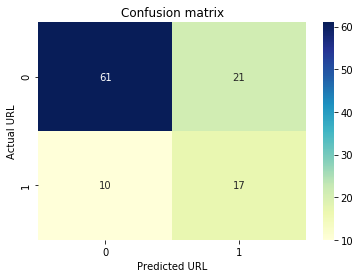

In [7]:
lr=ufp.prepareLR(dflr,0.5,5)
ufp.prepareCM(lr[3],lr[4])

### Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
да се добави
може да се добави и ROC Curve

In [8]:
ufp.prepareA(lr[0],lr[2],lr[3],lr[4],lr[6])

The training accuracy 0.7798165137614679
The testing accuracy: 0.7155963302752294
Precision: 0.4473684210526316
Recall: 0.6296296296296297


In [9]:
ufp.prepareC(lr[3],lr[4])

              precision    recall  f1-score   support

           0       0.86      0.74      0.80        82
           1       0.45      0.63      0.52        27

   micro avg       0.72      0.72      0.72       109
   macro avg       0.65      0.69      0.66       109
weighted avg       0.76      0.72      0.73       109



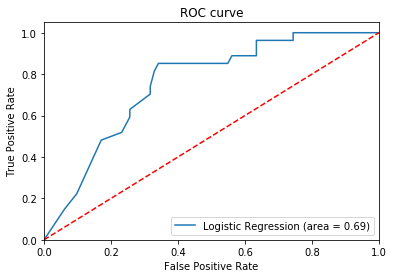

In [10]:
ufp.prepareR(lr[1],lr[3],lr[4],lr[6])

### Predict URLs

#### Display all

In [11]:
df_new=ufp.prepareP(dflr,lr[3],lr[4],lr[5],lr[6])
df_new

,ID,Name,Link position,Score,Suggested URL,URL,predict,0,1
0,000000000,National Statistical Institute,0.0,66.00,https://www.nsi.bg/en,NaN,1,0.486328,0.513672
1,000000000,National Statistical Institute,1.0,0.00,https://www.ine.es/en/welcome.shtml,NaN,0,0.982452,0.017548
2,000000000,National Statistical Institute,2.0,16.66,https://www.nsi.bg/en/content/11223/statistica...,NaN,1,0.388713,0.611287
3,000000000,National Statistical Institute,3.0,8.73,http://www.insse.ro/cms/en,NaN,0,0.967423,0.032577
4,000000000,National Statistical Institute,6.0,0.00,https://www.niss.org/,NaN,0,0.988146,0.011854
5,000000000,National Statistical Institute,8.0,0.00,https://statinja.gov.jm/,NaN,0,0.988146,0.011854
6,000000000,National Statistical Institute,9.0,1.82,https://www.ons.gov.uk/,NaN,0,0.977883,0.022117
7,000000001,STATISTIK AUSTRIA,0.0,95.00,https://www.statistik.at/,http://www.statistik.at,0,0.539860,0.460140
8,000000001,STATISTIK AUSTRIA,2.0,93.10,http://www.statistik-austria.at/,http://www.statistik.at,0,0.539860,0.460140
9,000000001,STATISTIK AUSTRIA,3.0,0.00,https://www.alexa.com/siteinfo/statistik-austr...,http://www.statistik.at,0,0.982452,0.017548


#### Display 1.0

In [12]:
df_sug=ufp.prepareS(df_new)
df_sug

,ID,Name,Link position,Score,Suggested URL,URL,predict,0,1
0,000000000,National Statistical Institute,0.0,66.00,https://www.nsi.bg/en,NaN,1,0.486328,0.513672
1,000000000,National Statistical Institute,1.0,0.00,https://www.ine.es/en/welcome.shtml,NaN,0,0.982452,0.017548
2,000000000,National Statistical Institute,2.0,16.66,https://www.nsi.bg/en/content/11223/statistica...,NaN,1,0.388713,0.611287
3,000000000,National Statistical Institute,3.0,8.73,http://www.insse.ro/cms/en,NaN,0,0.967423,0.032577
4,000000000,National Statistical Institute,6.0,0.00,https://www.niss.org/,NaN,0,0.988146,0.011854
5,000000000,National Statistical Institute,8.0,0.00,https://statinja.gov.jm/,NaN,0,0.988146,0.011854
6,000000000,National Statistical Institute,9.0,1.82,https://www.ons.gov.uk/,NaN,0,0.977883,0.022117
7,000000001,STATISTIK AUSTRIA,0.0,95.00,https://www.statistik.at/,http://www.statistik.at,0,0.539860,0.460140
8,000000001,STATISTIK AUSTRIA,2.0,93.10,http://www.statistik-austria.at/,http://www.statistik.at,0,0.539860,0.460140
9,000000001,STATISTIK AUSTRIA,3.0,0.00,https://www.alexa.com/siteinfo/statistik-austr...,http://www.statistik.at,0,0.982452,0.017548


#### Display 1.0 and 1 > 0.5

In [13]:
df_sel=ufp.prepareSS(df_sug,0.5,True)
df_sel

,ID,Name,Link position,Score,Suggested URL,URL,predict,0,1
0,000000000,National Statistical Institute,0.0,66.00,https://www.nsi.bg/en,NaN,1,0.486328,0.513672
33,000000006,Institute of Statistics,3.0,75.66,http://www.instat.gov.al/en/Home.aspx,http://www.instat.gov.al,1,0.388713,0.611287
41,000000007,Institute of Statistics,3.0,70.81,http://www.instat.gov.al/en/Home.aspx,NaN,1,0.388713,0.611287
49,000000008,Institute of Statistics,3.0,77.60,http://www.instat.gov.al/en/Home.aspx,http://www.instat.gov.al,1,0.388713,0.611287
57,000000009,Institute of Statistics,3.0,93.12,http://www.instat.gov.al/en/Home.aspx,http://www.instat.gov.al,1,0.359657,0.640343
65,000000010,Institute of Statistics,3.0,81.48,http://www.instat.gov.al/en/Home.aspx,NaN,1,0.388713,0.611287
108,000000017,National Statistical Committee of the Republic...,0.0,55.00,https://www.belstat.gov.by/en/,https://www.belstat.gov.by,1,0.486328,0.513672
172,000000026,Federal Statistical Office,5.0,34.20,https://context.reverso.net/translation/englis...,https://www.destatis.de,1,0.471500,0.528500
208,000000031,Statistics Greenland,0.0,70.00,https://www.stat.gl/?lang=en,http://www.stat.gl/,1,0.388713,0.611287
215,000000032,Statistics Greenland,0.0,86.00,http://www.stat.gl/?lang=en,http://www.stat.gl/,1,0.359657,0.640343


#### This is Logistic Regression Suggested URL

In [14]:
df_sel=ufp.prepareSS(df_sug,0.5,False)
df_sel

,ID,Name,This is Logistic Regression Suggested URL
0,000000000,National Statistical Institute,https://www.nsi.bg
1,000000007,Institute of Statistics,http://www.instat.gov.al
2,000000010,Institute of Statistics,http://www.instat.gov.al
3,000000033,Statistics Greenland,https://www.stat.gl
4,000000036,Hellenic Statistical Authority,https://www.statistics.gr
5,000000038,Statistics Denmark,https://www.dst.dk
6,000000049,Statistics Iceland,https://www.statice.is
7,000000064,Kosovo Agency of Statistics,https://ask.rks-gov.net
8,000000066,Agency of Statistics,https://ask.rks-gov.net
9,000000069,Central Statistical Bureau,https://www.csb.gov.lv


## Event logging end

In [22]:
logging.info('End {0}'.format(title))